In [3]:
import pandas as pd
Ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [2]:
print(Ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

This data focuses on the electric vehicle population in the United States. First, we need to clean the dataset before proceeding:

In [4]:
Ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
Ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
Ev_data = Ev_data.dropna()

To analyze the market size of electric vehicles, we can explore the following areas:

1. EV Adoption Over Time: Examine how the number of electric vehicles has grown by model year.
2. Geographical Distribution: Determine where EVs are most commonly registered, such as by county or city.
3. EV Types: Analyze the data by electric vehicle type, such as Battery Electric Vehicles (BEVs).
4. Make and Model Popularity: Identify which makes and models of EVs are the most popular.
5. Electric Range Analysis: Assess the electric range of vehicles to see advancements in EV technology.
6. Estimated Market Growth: Estimate the growth in the electric vehicle market size.

Let's begin by analyzing EV Adoption Over Time. We can do this by visualizing the number of EVs registered each year. This will help us understand how the EV population has increased over the years:

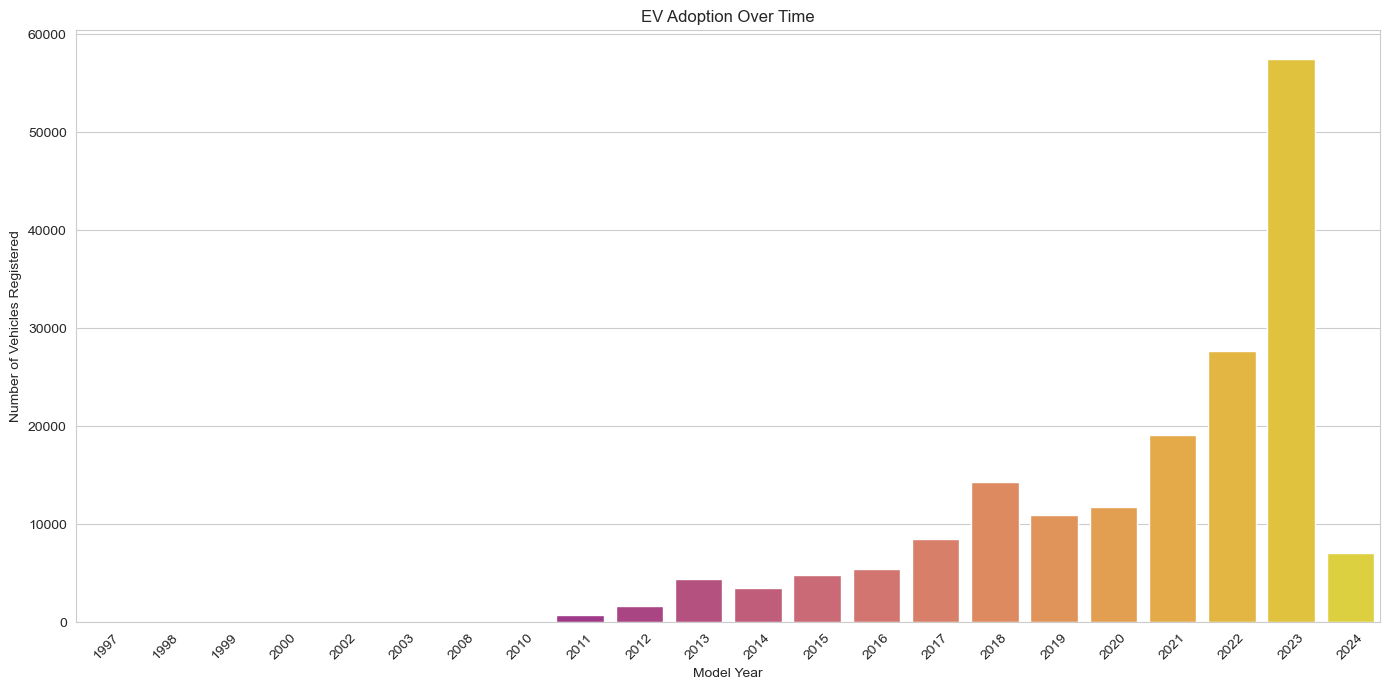

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Count EVs by model year and sort
Ev_adoption_by_year = Ev_data['Model Year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(x=Ev_adoption_by_year.index, y=Ev_adoption_by_year.values, palette="plasma")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart clearly illustrates a rising trend in EV adoption over time, with a notable acceleration beginning around 2016. Up until that year, the growth in registered vehicles was gradual. However, from 2017 onwards, the rate of increase becomes more pronounced. The year 2023 stands out with a particularly sharp rise, as evidenced by the tallest bar in the graph, signifying a peak in EV adoption.

Let's begin by identifying the top 3 counties with the highest number of EV registrations. After that, we’ll analyze the distribution of EVs within the cities of these counties. Here's a step-by-step approach:

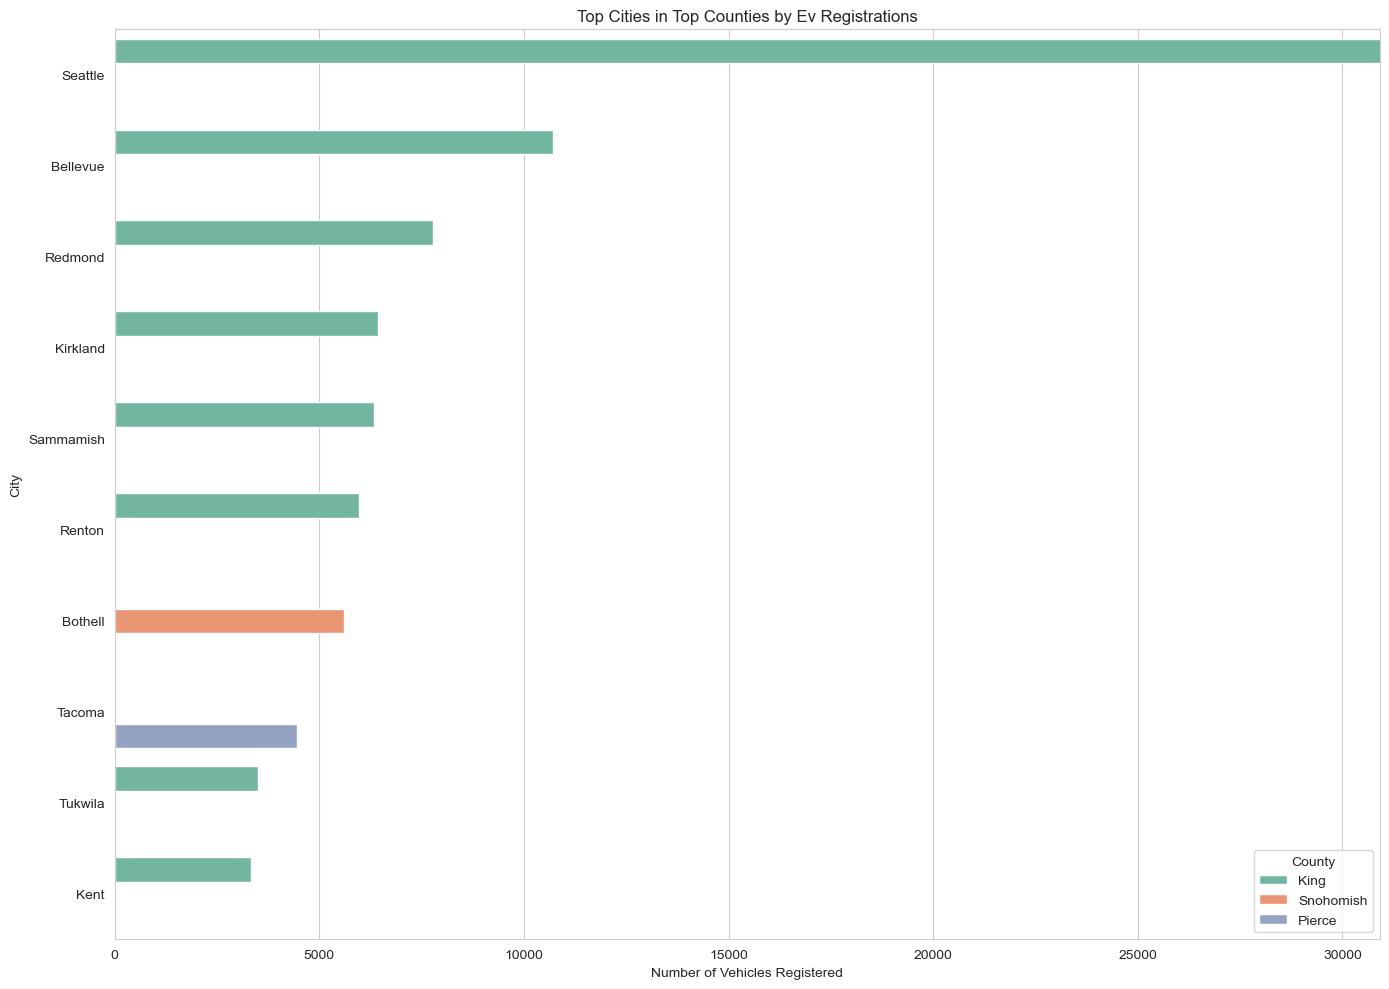

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Geographical distribution at county level
Ev_county_distribution = Ev_data['County'].value_counts()
top_counties = Ev_county_distribution.head(3).index

# Filter the dataset for these top counties
top_counties_data = Ev_data[Ev_data['County'].isin(top_counties)]

# Analyze the distribution of Ev registrations within the cities of these top counties
Ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualize the top 10 cities across these counties
top_cities = Ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="Set2")

# Increase the width of each bar
for bar in ax.patches:
    bar.set_width(bar.get_width() * 1.2)  # Adjust multiplier to increase or decrease width

plt.title('Top Cities in Top Counties by Ev Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()


The graph above illustrates the number of electric vehicles registered across various cities in three counties: King, Snohomish, and Pierce. Each horizontal bar represents a city, with the bar length indicating the number of registered vehicles, and the colors differentiating the counties.

Key Findings:
  1.Seattle (King County) leads significantly in EV registrations, far    surpassing other cities.
  2.Bellevue and Redmond (both in King County) have the next highest registrations, though still much lower than Seattle.
  3.Kirkland and Sammamish in Snohomish County exhibit moderate levels of EV registrations.
  4.Tacoma and Tukwila in Pierce County have the lowest registrations, with Tacoma slightly ahead of Tukwila.
  5.The majority of cities with high EV registrations are located in King County, which dominates EV adoption compared to Snohomish and Pierce Counties.
  6.The data shows that EV adoption is concentrated in specific areas, particularly in King County.

Next Steps:
      We will now examine the types of electric vehicles in this dataset. By analyzing the distribution of vehicle types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), we can gain insights into consumer preferences and the trends between purely electric and hybrid electric vehicles. Let’s visualize the breakdown of EV types to identify the most popular categories among the registered vehicles.

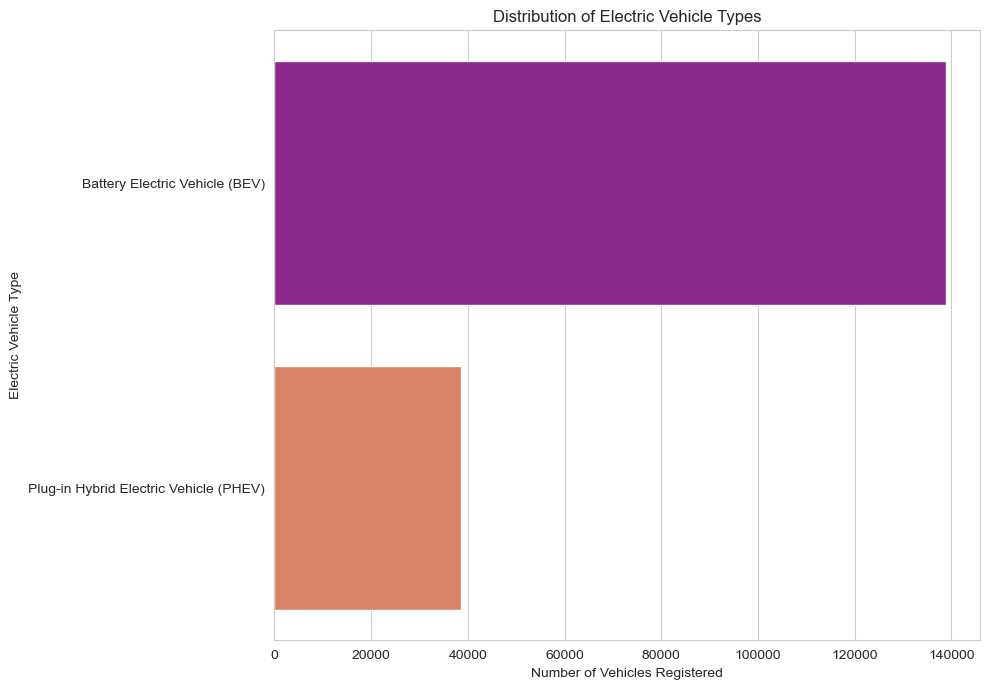

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of registrations for each type of electric vehicle
Ev_type_counts = Ev_data['Electric Vehicle Type'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 7))
sns.barplot(x=Ev_type_counts.values, y=Ev_type_counts.index, palette="plasma")

# Customize the plot
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()

# Display the plot
plt.show()


The graph above indicates that Battery Electric Vehicles (BEVs) are more popular than Plug-in Hybrid Electric Vehicles (PHEVs) among the registered electric vehicles in the United States.

Next, we will analyze the popularity of electric vehicle manufacturers and models. This analysis will help us identify which manufacturers and specific models are leading the EV market. Understanding this can reveal consumer preferences, brand loyalty, and the effectiveness of different manufacturers' strategies in promoting electric vehicles.

We'll start by examining the most popular manufacturers and then delve into the most popular models within those manufacturers.

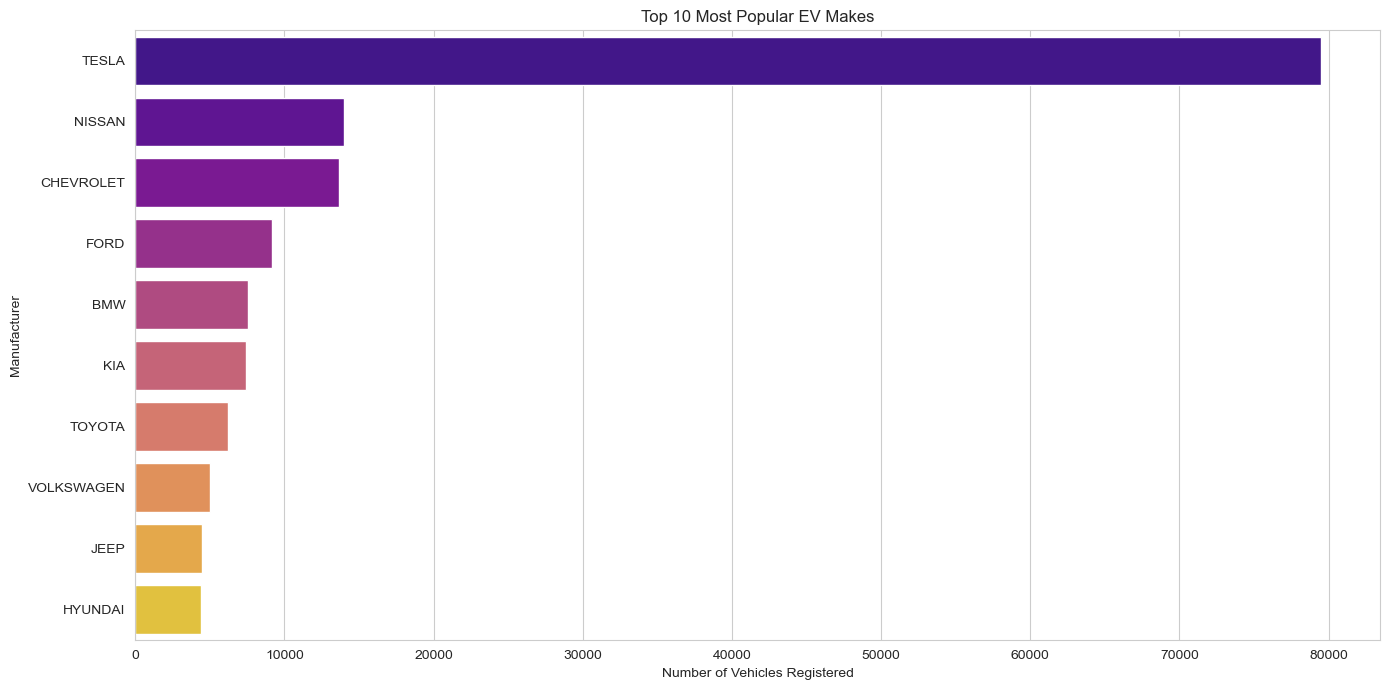

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the top 10 most popular EV manufacturers based on the number of registrations
top_10_ev_makes = Ev_data['Make'].value_counts().head(10)

# Set up the plot size
plt.figure(figsize=(14, 7))

# Create a horizontal bar plot with a color palette
sns.barplot(x=top_10_ev_makes.values, y=top_10_ev_makes.index, palette="plasma")

# Add a title and labels to the plot
plt.title('Top 10 Most Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Manufacturer')

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# Display the plot
plt.show()



Based on the chart, we observe the following:

  1.TESLA stands out as the leading manufacturer, holding a significant lead in the number of vehicles registered.
  2.NISSAN ranks second in popularity, while CHEVROLET follows closely. Both have a markedly lower number of registrations compared to TESLA.
  3.The subsequent manufacturers, in descending order of registrations, are       4.FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI.
  
To gain deeper insights into consumer preferences,the next step is to analyze the most popular models within these top manufacturers. This will help us understand which specific models are driving the popularity of each brand.

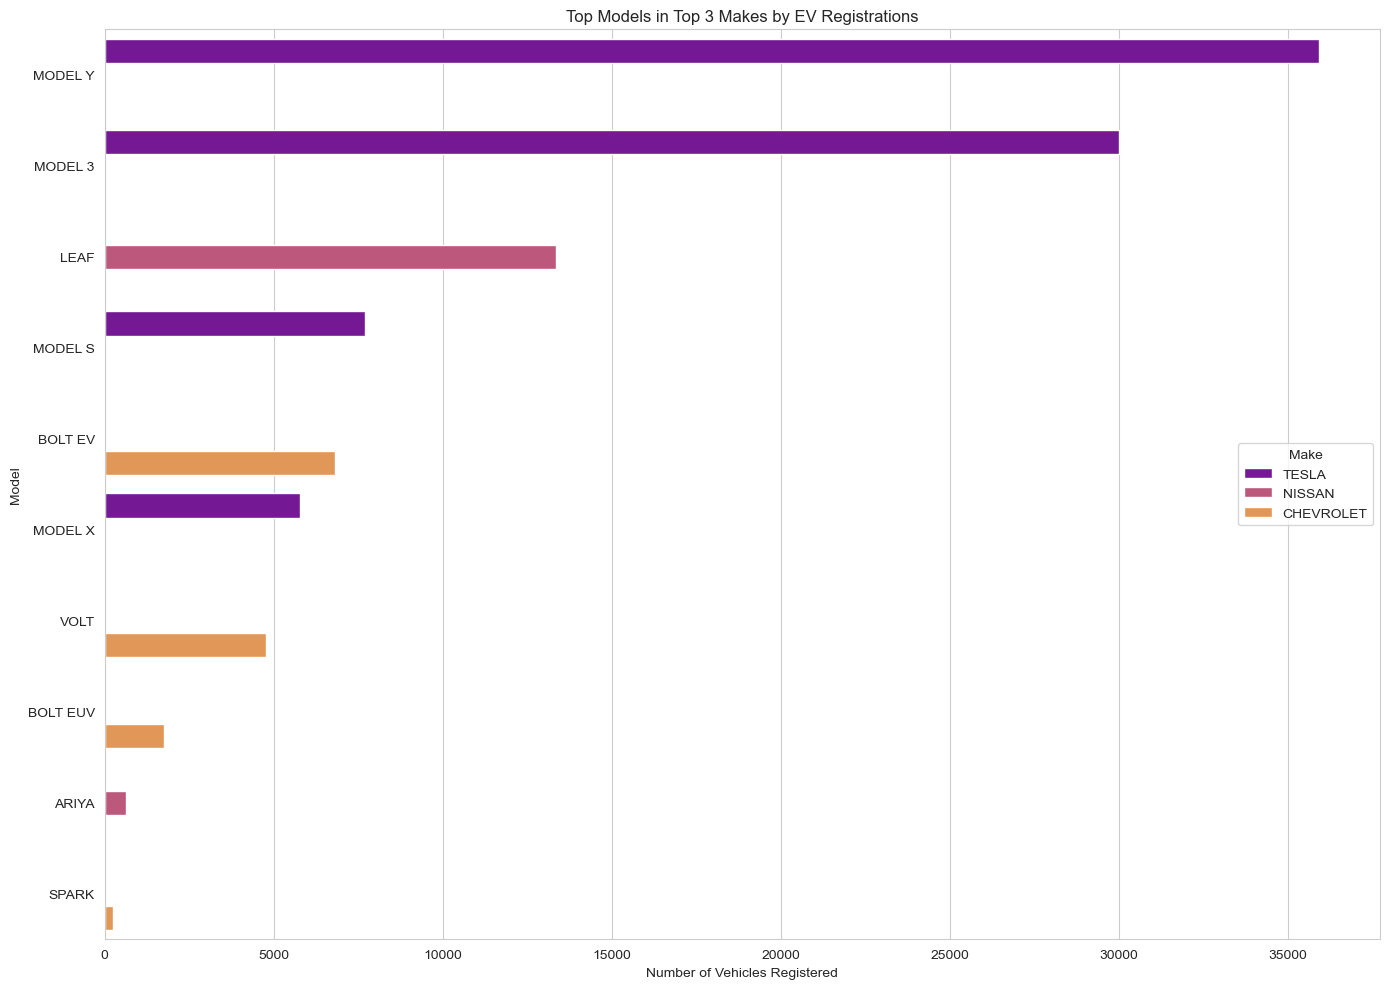

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of vehicles for each manufacturer
Ev_make_distribution = Ev_data['Make'].value_counts()

# Select the top 3 manufacturers based on the number of vehicles registered
top_3_makes = Ev_make_distribution.head(3).index

# Filter the dataset for these top manufacturers
top_makes_data = Ev_data[Ev_data['Make'].isin(top_3_makes)]

# Analyze the popularity of EV models within these top manufacturers
Ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualize the top 10 models across these manufacturers for clarity
top_models = Ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(14, 10))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="plasma")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()



The graph above illustrates the distribution of electric vehicle registrations among various models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Key observations include:

  1.TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y leading in registrations.
  2.NISSAN’s LEAF is the third most registered model and the highest among non-TESLA vehicles.
  3.TESLA’s MODEL S and MODEL X also show significant registration numbers.
  4.CHEVROLET’s BOLT EV and VOLT rank next with substantial registrations, followed by the BOLT EUV.
  5.NISSAN’s ARIYA and CHEVROLET’s SPARK have the fewest registrations among the models displayed.

  Next, we will examine the electric range of vehicles, a crucial factor in analyzing the market size of electric vehicles. The electric range reflects how far an EV can travel on a single charge, and advancements in battery technology have been progressively increasing these ranges. We will analyze the distribution of electric ranges in the dataset to identify notable trends, such as improvements over time or variations between different vehicle types or manufacturers.

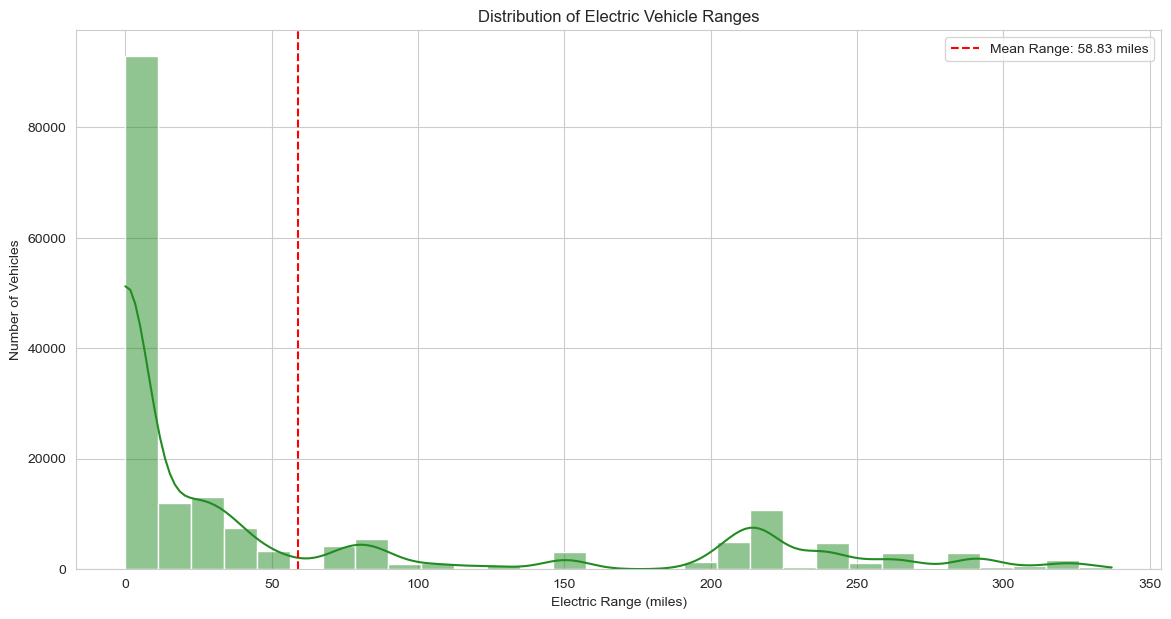

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of electric range
plt.figure(figsize=(14, 7))
sns.histplot(Ev_data['Electric Range'], bins=30, kde=True, color='forestgreen')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(Ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {Ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()



The graph above illustrates the distribution of electric ranges for vehicles, highlighting the mean electric range. Key observations include:

  1.There is a noticeable peak in the frequency of vehicles with lower electric ranges, particularly just below 50 miles.
  2.The distribution is right-skewed, with a long tail extending towards higher ranges, although vehicles with these extended ranges are significantly less common.
  3.The mean electric range of approximately 58.84 miles is relatively low compared to the highest ranges depicted in the graph.
  4.Although some electric vehicles boast ranges of up to around 350 miles, the majority fall below the mean range.
  5.This suggests that while high-range EVs are available, the average electric range is lower due to a substantial number of vehicles with shorter ranges.

  Next, we will examine the trend of electric ranges over model years. This analysis will provide insights into how advancements in battery technology and vehicle design have influenced the electric range of vehicles over time. A positive trend in this analysis would indicate continuous improvements, potentially alleviating range anxiety and offering consumers EVs with longer driving capabilities.

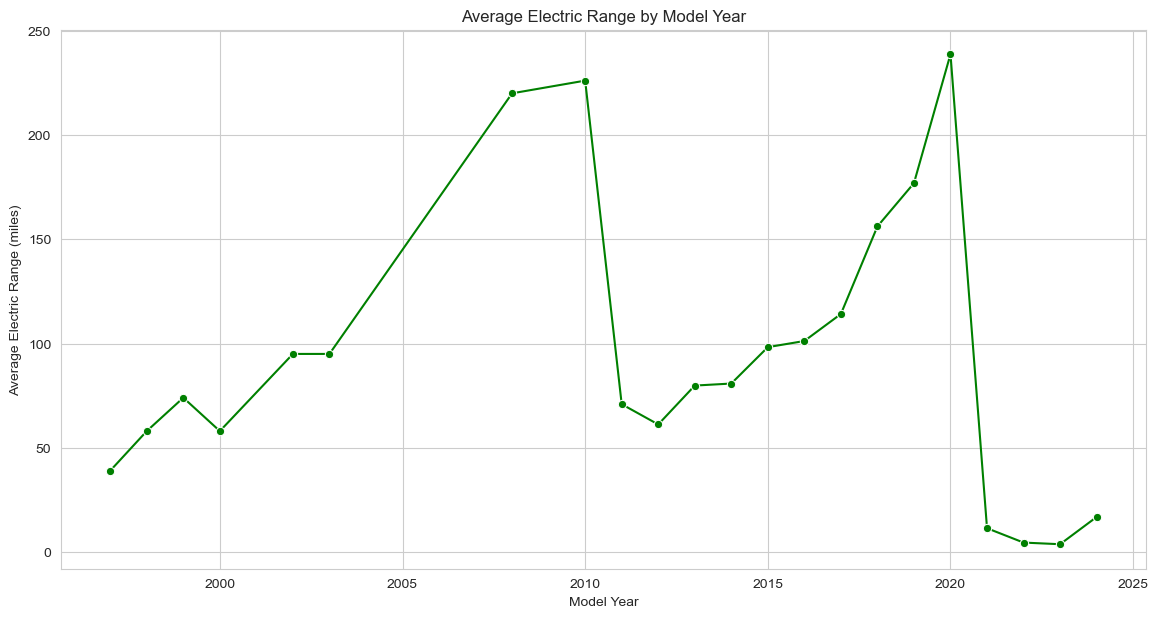

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average electric range by model year
average_range_by_year = Ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

# Plot the average electric range by model year
plt.figure(figsize=(14, 7))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()


The graph above illustrates the progression of the average electric range of vehicles from around 2000 to 2024. Key observations include:

Overall Trend:
  1.There is a general upward trend in the average electric range of EVs over the years, reflecting advancements in technology and battery efficiency.
  2.Peak in 2020: A noticeable peak occurs around the year 2020, indicating a high point in average electric range.
  3.Post-2020 Decline: Following 2020, there is a significant drop in the average range, which may suggest incomplete data for recent years or the introduction of several lower-range models.
  4.Recent Recovery: After the sharp decline, the average range shows a slight recovery in the most recent year depicted on the graph.
  5.These observations suggest that while there have been fluctuations, the long-term trend over the past two decades has been towards increasing the electric range of EVs.

  Next, we will analyze how electric ranges vary among the top manufacturers and models. This will help us understand how different manufacturers are addressing the critical aspect of electric range and identify which models excel in offering superior range capabilities.

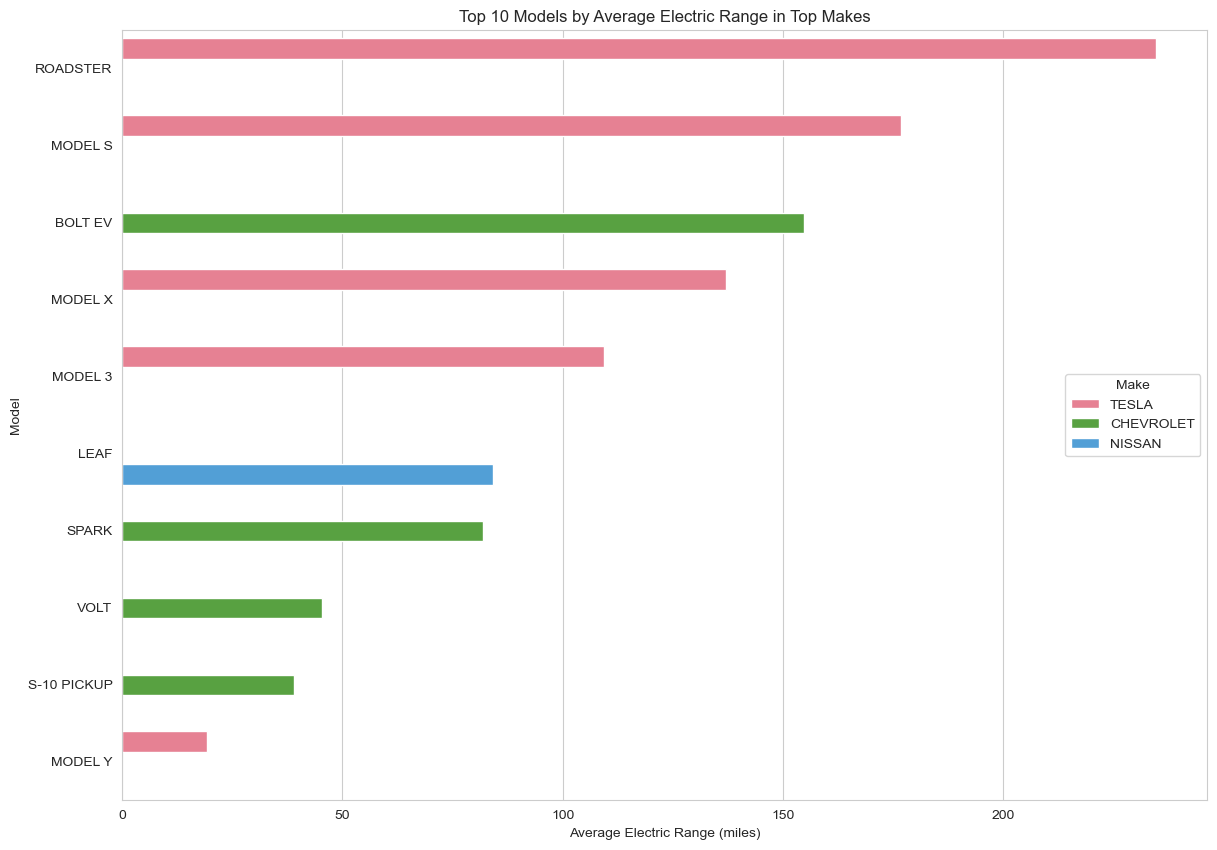

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average electric range for each model and manufacturer
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# Select the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

# Plot the top 10 models by average electric range
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="husl")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()


The TESLA ROADSTER ranks highest in average electric range among the models listed. TESLA models (ROADSTER, MODEL S, MODEL X, and MODEL 3) dominate the top positions, indicating that, on average, TESLA vehicles offer superior electric ranges. The CHEVROLET BOLT EV stands out among CHEVROLET models, featuring a significantly higher range compared to the VOLT and S-10 PICKUP. On the other hand, NISSAN’s LEAF and CHEVROLET’s SPARK are positioned in the lower half of the chart, reflecting more modest average ranges.

Estimated Market Size Analysis of Electric Vehicles in the United States

Next, we'll estimate the market size of electric vehicles (EVs) in the United States by counting the number of EVs registered each year.

In [53]:
# calculate the number of EVs registered each year
Ev_registration_counts = Ev_data['Model Year'].value_counts().sort_index()
Ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

The dataset provides annual EV registration numbers from 1997 through 2024. Notably, the data for 2024 is incomplete, covering only up to March. Here’s a summary of recent years:

  1.2021: 19,063 EVs registered.
  2.2022: Registrations increased to 27,708 EVs.
  3.2023: A significant rise to 57,519 EVs was observed.
  4.2024: Currently, 7,072 EVs are registered, indicating that this data is partial.

  To estimate the total number of EVs expected to be registered in 2024, we can use a growth rate based on the trends from the previous years.

We’ll calculate the Compound Annual Growth Rate (CAGR) using data from a recent year with complete information (2023) and an earlier year to estimate the number of EVs registered in 2024. Additionally, using this growth rate, we will project the market size for the next five years. Let’s proceed with these calculations:

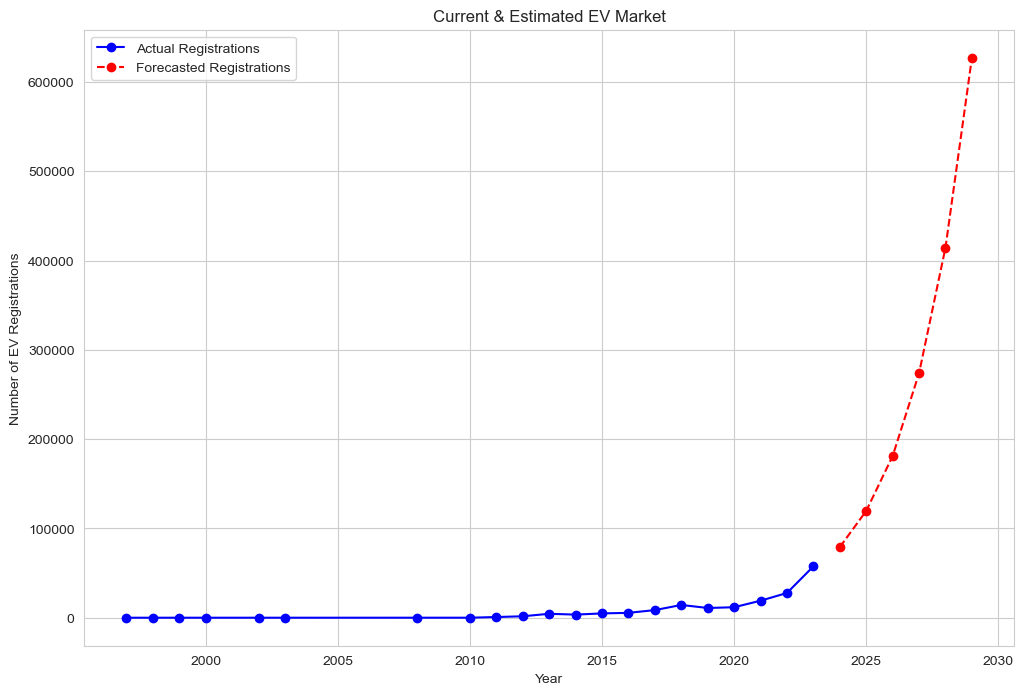

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# Actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')  # Blue line for actual data
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')  # Red dashed line for forecasted data

# Customize the plot
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Observations from the Graph:
  1.Historical Trends: The graph shows that actual EV registrations were relatively low and stable until around 2010. After this point, there has been a consistent and steep upward trend, indicating a significant increase in EV adoption.
  2.Forecasted Trends: The forecasted data predicts an even more dramatic increase in EV registrations in the near future. The numbers are expected to rise sharply, reflecting a strong growth trajectory.
  3.Market Implications: The growing trend in actual EV registrations, combined with the projected acceleration, suggests that the EV market size is set to expand considerably. This sharp increase in forecasted registrations indicates rising consumer adoption of EVs, which is likely to continue.

Summary:
  Market size analysis is a vital component of market research, helping businesses gauge potential sales volumes, assess market saturation, and identify growth opportunities. Our analysis of the electric vehicle (EV) market reveals a promising outlook, driven by increasing consumer preference and substantial growth projections. This trend points to a significant shift in consumer behavior towards EVs, suggesting ample investment and business opportunities in the EV industry.